In [1]:
import numpy as np
import pandas as pd
#import dask.bag as db
import dask.dataframe as dd
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read file
with open("countries.txt", mode="r", encoding="utf-8") as f:
    content = f.readlines()
content = [x.strip() for x in content] 
# create table with the countries
countries=[]
for line in content:
    words=line.split('|')
    country=[]
    for word in words:
        country.append(word)
    countries.append(country)

In [3]:
def find_which_country(countries, location):
    if isinstance(location, str):
        for index, country in enumerate(countries):
            for word in country:
                if word in location:
                    return countries[index][0]
    return 'Others'

In [4]:
df = dd.read_csv('Users.csv',usecols=[2,3,4,5])
df = df.astype({'CreationDate': 'datetime64', 'LastAccessDate': 'datetime64'})

In [5]:
df['Country']=df.apply(lambda row: find_which_country(countries, row['Location']), axis=1)
df_group=df.groupby(df['Country']).count().compute()

df_group.info()

/home/tamiris/anaconda3/lib/python3.6/site-packages/dask/dataframe/core.py:3018: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  warnings.warn(msg)


<class 'pandas.core.frame.DataFrame'>
Index: 218 entries, Afghanistan to Saint Helena
Data columns (total 4 columns):
CreationDate      218 non-null int64
LastAccessDate    218 non-null int64
Location          218 non-null int64
Reputation        218 non-null int64
dtypes: int64(4)
memory usage: 8.5+ KB


In [8]:
pd.set_option('display.max_rows', 500)
df_group = df_group.drop(['CreationDate', 'LastAccessDate','Reputation'], axis=1)
df_group

,Location
Country,
Afghanistan,819
Albania,1247
Algeria,4293
American Samoa,7
Andorra,54
Angola,219
Anguilla,6
Antarctica,220
Argentina,11850


,Location
Country,
Others,589483
India,373529
United States,193860
Germany,74616
United Kingdom,66101
Canada,58535
Brazil,54104
France,47648
China,46062


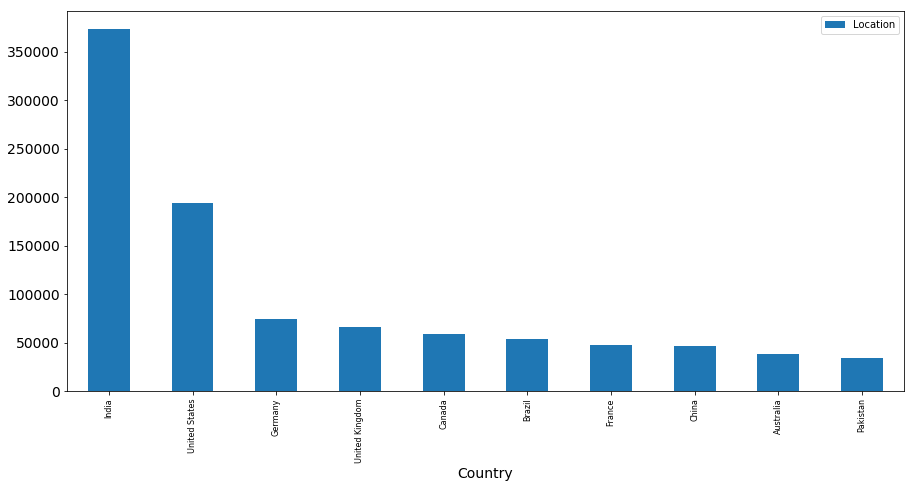

In [9]:
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] =8
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams["figure.figsize"] = [15, 7]
d1 = df_group.sort_values('Location', ascending=False).nlargest(11, 'Location')
d1[1:].plot.bar()
d1

In [10]:
df_HUC = df[df['Country'].str.contains("India|United States|Germany|United Kingdom|Canada|Brazil|France|China|Australia|Pakistan")]
df_HUC = df_HUC.compute()


,Country,Reputation
0,Australia,607.117789
1,Brazil,145.384648
2,Canada,478.192329
3,China,99.071339
4,France,417.522309
5,Germany,604.459995
6,India,145.421833
7,Pakistan,122.271936
8,United Kingdom,995.735783
9,United States,380.270768


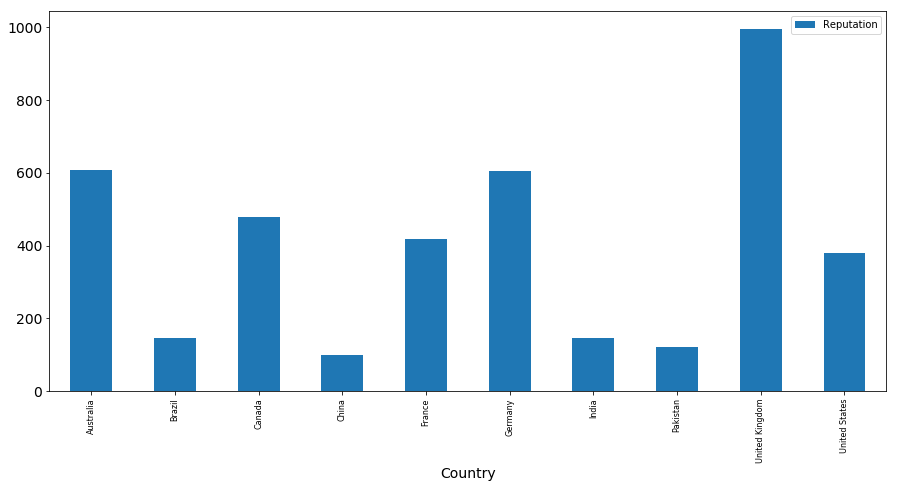

In [11]:
#average reputation for the 10 countries with most users
plt.rcParams["figure.figsize"] = [15, 7]
df_HUCRepMean = df_HUC.groupby('Country')['Reputation'].mean().reset_index()
df_HUCRepMean.plot.bar(x='Country')
df_HUCRepMean

In [12]:
#number of new accounts created per year per country

new = df_HUC['CreationDate'].groupby([df_HUC.CreationDate.dt.year.rename('year'), df_HUC.Country.rename('New Accounts')]).agg('count').reset_index()
new = new.pivot('year', 'New Accounts')

new

CreationDate                                              \
New Accounts    Australia Brazil Canada  China France Germany   India   
year                                                                    
2008                  754    149    869     22    203     511     353   
2009                 1421    488   1946    324    626    1502    1865   
2010                 1814    934   2510    983   1236    2637    4779   
2011                 2418   1750   3289   2185   2114    4138    9387   
2012                 3256   3462   4328   3933   3308    6194   18905   
2013                 3772   5408   5225   4969   4549    7666   28782   
2014                 3609   5494   5020   3686   4736    7496   30440   
2015                 2387   3969   3728   4112   3849    5888   26392   
2016                 3440   6141   5857   5052   5421    8373   44765   
2017                 8536  13346  13765  12186  11376   16318  114189   
2018                 6712  12963  11998   8610  10230   13893   93672   

                                                    
New Accounts Pakistan United Kingdom United States  
year                                                
2008               14           1725          2545  
2009              127           3509          3139  
2010              329           4468          3753  
2011              743           5354          6399  
2012             1453           6389          9286  
2013             2239           7097         12206  
2014             2718           6114         11815  
2015             2341           4204         11651  
2016             4071           7445         32609  
2017            10535          17135         90415  
2018             9780           2661         10042

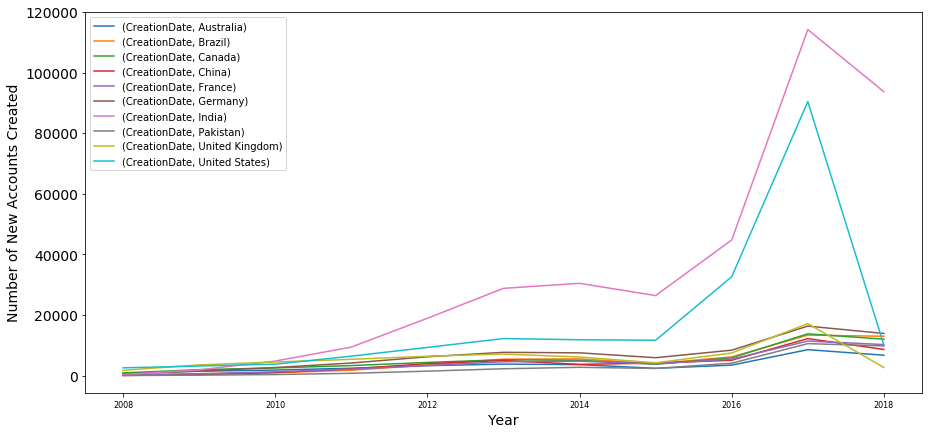

In [13]:
#line plot
new.plot.line().set(xlabel = 'Year', ylabel = 'Number of New Accounts Created')
plt.legend(title=False)
plt.show()

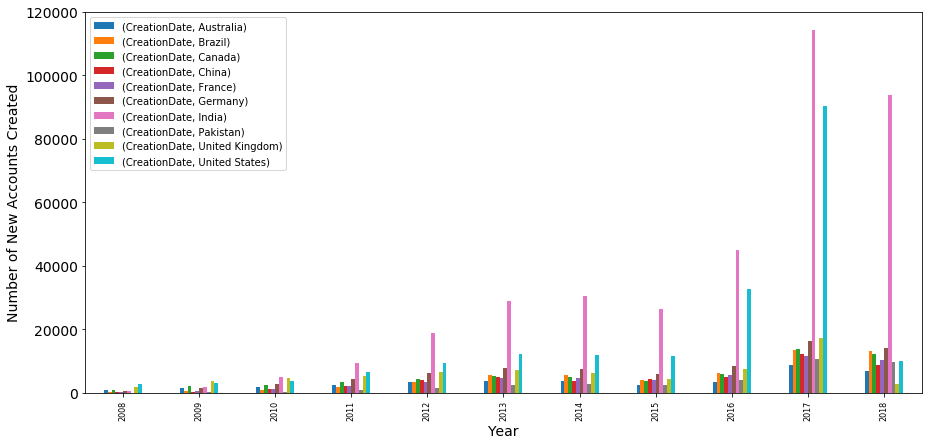

In [14]:
#bar plot
new.plot.bar().set(xlabel = 'Year', ylabel = 'Number of New Accounts Created')
plt.legend(title=False)
plt.show()

In [15]:
#number of last accesses per year per country

new2 = df_HUC['LastAccessDate'].groupby([df_HUC.LastAccessDate.dt.year.rename('year'), df_HUC.Country.rename('Last Accesses')]).agg('count').reset_index()
new2 = new2.pivot('year', 'Last Accesses')

new2

LastAccessDate                                              \
Last Accesses      Australia Brazil Canada  China France Germany   India   
year                                                                       
2008                      24      6     17      1      5       8      13   
2009                      72     22     67     16     19      40     135   
2010                     177     50    248     86     84     183     691   
2011                     319    144    398    295    189     346    1429   
2012                     497    323    614    794    356     612    3048   
2013                     906    693   1000   1840    730    1126    6227   
2014                    1415   1280   1744   2016   1303    1980   10090   
2015                    1590   1350   2050   2153   1554    2452    8885   
2016                    1920   2198   2827   2932   2050    3111   15617   
2017                    7538   9474  11242   9961   8361   11501   81895   
2018                   23661  38564  38328  25968  32997   53257  245499   

                                                     
Last Accesses Pakistan United Kingdom United States  
year                                                 
2008                 1             44            85  
2009                10            179           180  
2010                36            459           211  
2011               105            719           347  
2012               213           1017           596  
2013               458           1795          1076  
2014               904           2804          1696  
2015               846           2699          1707  
2016              1472           4044         10738  
2017              7893          14969         69751  
2018             22412          37372        107473

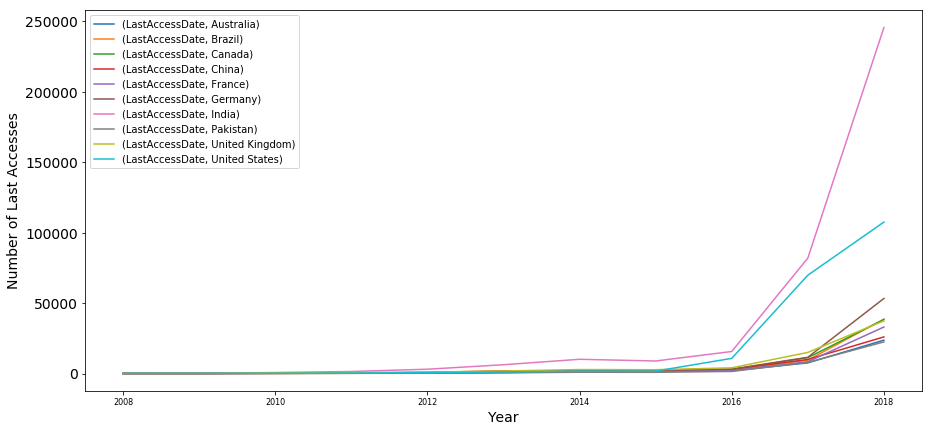

In [16]:
#line plot
new2.plot.line().set(xlabel = 'Year', ylabel = 'Number of Last Accesses')
plt.legend(title=False)
plt.show()


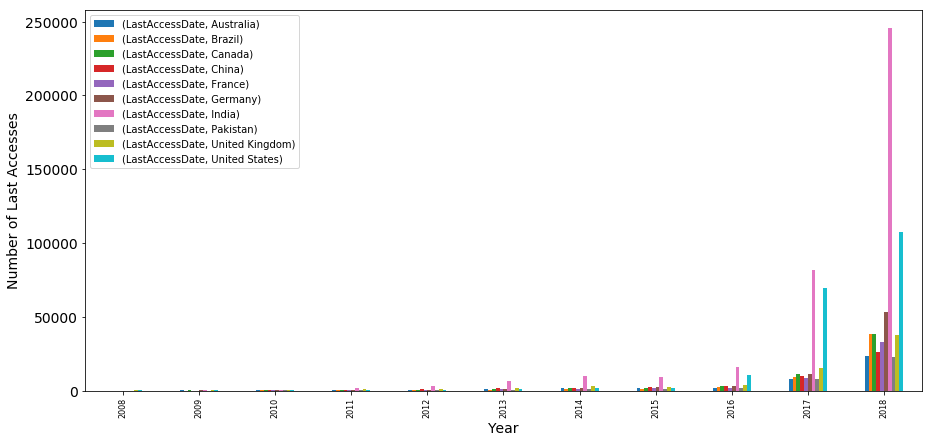

In [17]:
#bar plot
new2.plot.bar().set(xlabel = 'Year', ylabel = 'Number of Last Accesses')
plt.legend(title=False)
plt.show()


In [18]:
#dfRepMean has the average reputation for every country listed

dfRepMean = df.groupby('Country')['Reputation'].mean().reset_index()
dfRepMean = dfRepMean.compute()


,Country,Reputation
146,San Marino,6512.363636
195,Holy See (vatican City State),1619.000000
4,Andorra,1076.888889
178,United Kingdom,995.735783
164,Switzerland,889.360093
61,Gibraltar,802.938144
42,Czech Republic,784.276667
110,Micronesia,718.700000
121,New Zealand,688.969857
163,Sweden,637.050036


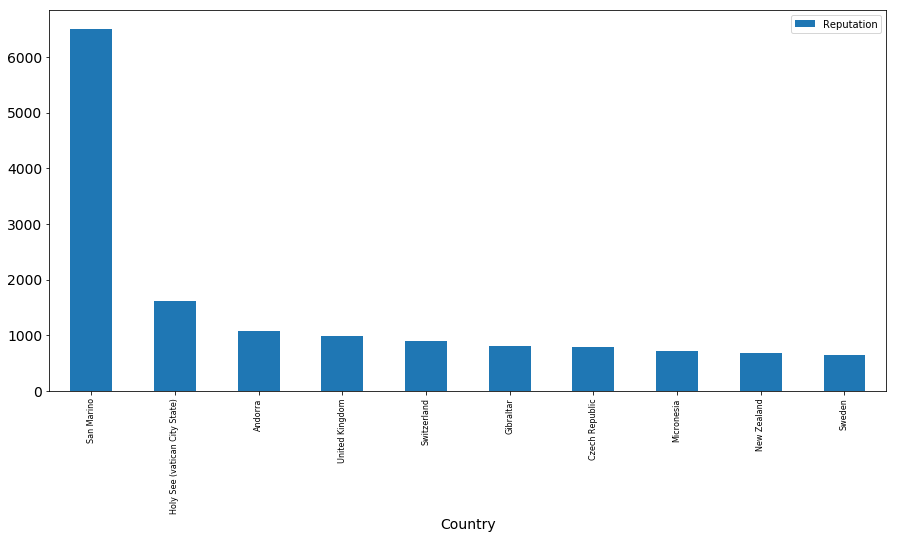

In [19]:
#dfRepMeanH has the countries with the 10 higher averages
plt.rcParams["figure.figsize"] = [15, 7]
dfRepMeanH = dfRepMean.nlargest(10, 'Reputation')
dfRepMeanH.plot.bar(x='Country')
dfRepMeanH